# Colab - Ejercicio AirBnB

## Extracción de datos

In [14]:
import pandas as pd

# os.chdir("C:/Users/Orlando/Documents/S7/IA-Avanzada/Semana1/Colab_AirBnb")

df = pd.read_csv("listings.csv.gz")
df.head(10)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,35797,https://www.airbnb.com/rooms/35797,20250319150644,2025-03-21,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Shopping Mall, Interlomas Park and th...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
1,44616,https://www.airbnb.com/rooms/44616,20250319150644,2025-03-20,previous scrape,Condesa Haus,A new concept of hosting in mexico through a b...,NaN,https://a0.muscache.com/pictures/251410/ec75fe...,196253,...,4.78,4.98,4.47,NaN,f,9,4,2,0,0.40
2,56074,https://www.airbnb.com/rooms/56074,20250319150644,2025-03-20,city scrape,Great space in historical San Rafael,This great apartment is located in one of the ...,Very traditional neighborhood with all service...,https://a0.muscache.com/pictures/3005118/60dac...,265650,...,4.94,4.76,4.79,NaN,f,1,1,0,0,0.49
3,67703,https://www.airbnb.com/rooms/67703,20250319150644,2025-03-20,previous scrape,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",NaN,https://a0.muscache.com/pictures/3281720/6f078...,334451,...,4.92,4.98,4.92,NaN,f,2,2,0,0,0.31
4,70644,https://www.airbnb.com/rooms/70644,20250319150644,2025-03-22,city scrape,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/f397d2da-d045...,212109,...,4.98,4.96,4.92,NaN,f,3,2,1,0,0.83
5,131610,https://www.airbnb.com/rooms/131610,20250319150644,2025-03-20,previous scrape,MARIA DEL ALMA,NaN,NaN,https://a0.muscache.com/pictures/837085/b9ed71...,647454,...,NaN,NaN,NaN,NaN,f,3,1,2,0,NaN
6,165772,https://www.airbnb.com/rooms/165772,20250319150644,2025-03-19,city scrape,BEST 5 Bedroom HOUSE IN S. Miguel Chapultepec,Welcome to Your Home in Mexico City<br />We ha...,San Miguel Chapultepec is the best kept secret...,https://a0.muscache.com/pictures/miso/Hosting-...,790208,...,4.90,4.75,4.91,NaN,f,5,5,0,0,2.27
7,171109,https://www.airbnb.com/rooms/171109,20250319150644,2025-03-22,city scrape,Cool room near WTC and Metrobus,"Stay in a private room 2 blocks away from WTC,...","Great location, feel comfortable and secure at...",https://a0.muscache.com/pictures/16040866/8b0a...,816295,...,4.95,4.96,4.81,NaN,f,2,0,2,0,0.83
8,287940,https://www.airbnb.com/rooms/287940,20250319150644,2025-03-20,city scrape,Furnished lovely cozy studio,We are in one of the best areas of mexico city...,condesa is one of the best areas to be in mexi...,https://a0.muscache.com/pictures/d5556da9-4edf...,1497087,...,4.84,4.96,4.68,NaN,f,13,13,0,0,3.10
9,291804,https://www.airbnb.com/rooms/291804,20250319150644,2025-03-20,previous scrape,A nice room with great location,NaN,NaN,https://a0.muscache.com/pictures/3323620/a48d3...,1511568,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN


In [15]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [17]:
# Remover listados con precios nulos
df = df.dropna(subset=['price'])

# Convertir la columna 'price' a tipo numérico (float)
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)

# Obtener el promedio de los precios
mean = df['price'].mean()
print(f"El precio promedio  es: ${mean:.2f}")

El precio promedio  es: $1665.01


In [18]:
# Obtener las 10 alcaldías con más alojamientos
top_alcaldias = df['neighbourhood_cleansed'].value_counts().head(10)
print("Las 10 alcaldías con más alojamientos son:")
print(top_alcaldias)

Las 10 alcaldías con más alojamientos son:
neighbourhood_cleansed
Cuauhtémoc             10434
Miguel Hidalgo          3764
Benito Juárez           2482
Coyoacán                1362
Álvaro Obregón           799
Venustiano Carranza      752
Tlalpan                  582
Gustavo A. Madero        424
Iztacalco                389
Azcapotzalco             317
Name: count, dtype: int64


In [19]:
top_hosts = df['host_name'].value_counts().head(10)
print("Las 10 personas con más alojamientos en total:")
print(top_hosts)

Las 10 personas con más alojamientos en total:
host_name
Alejandra     305
Alejandro     244
Juan          241
Blueground    225
Raul          225
Luis          214
Mr. W         201
Carlos        175
Eduardo       173
Jorge         172
Name: count, dtype: int64


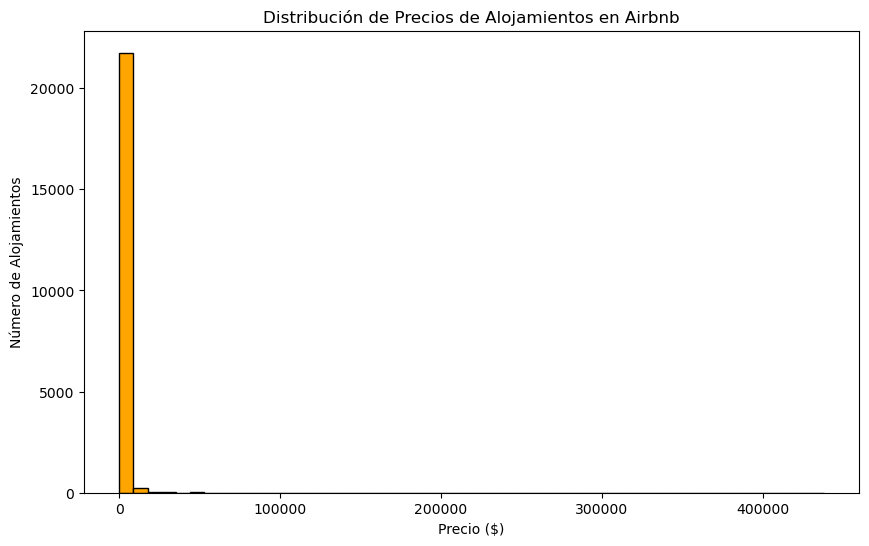

In [21]:
import matplotlib.pyplot as plt

# Gráfica del histograma de precios
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=50, color='orange', edgecolor='black')
plt.title('Distribución de Precios de Alojamientos en Airbnb')
plt.xlabel('Precio ($)')
plt.ylabel('Número de Alojamientos')
plt.show()